In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
cr = pd.read_csv('cust_review.csv')
cr

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [29]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [30]:
cr.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [31]:
cr.drop('Unnamed: 0', axis=1, inplace=True)

In [32]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [33]:
cr.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [34]:
cr.describe().T

,count,mean,std,min,25%,50%,75%,max
Clothing ID,23486.0,918.118709,203.298980,0.0,861.0,936.0,1078.0,1205.0
Age,23486.0,43.198544,12.279544,18.0,34.0,41.0,52.0,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.0,5.0,5.0,5.0
Recommended IND,23486.0,0.822362,0.382216,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,23486.0,2.535936,5.702202,0.0,0.0,1.0,3.0,122.0


In [35]:
cr.describe(include='O').T

,count,unique,top,freq
Title,19676,13993,Love it!,136
Review Text,22641,22634,Perfect fit and i've gotten so many compliment...,3
Division Name,23472,3,General,13850
Department Name,23472,6,Tops,10468
Class Name,23472,20,Dresses,6319


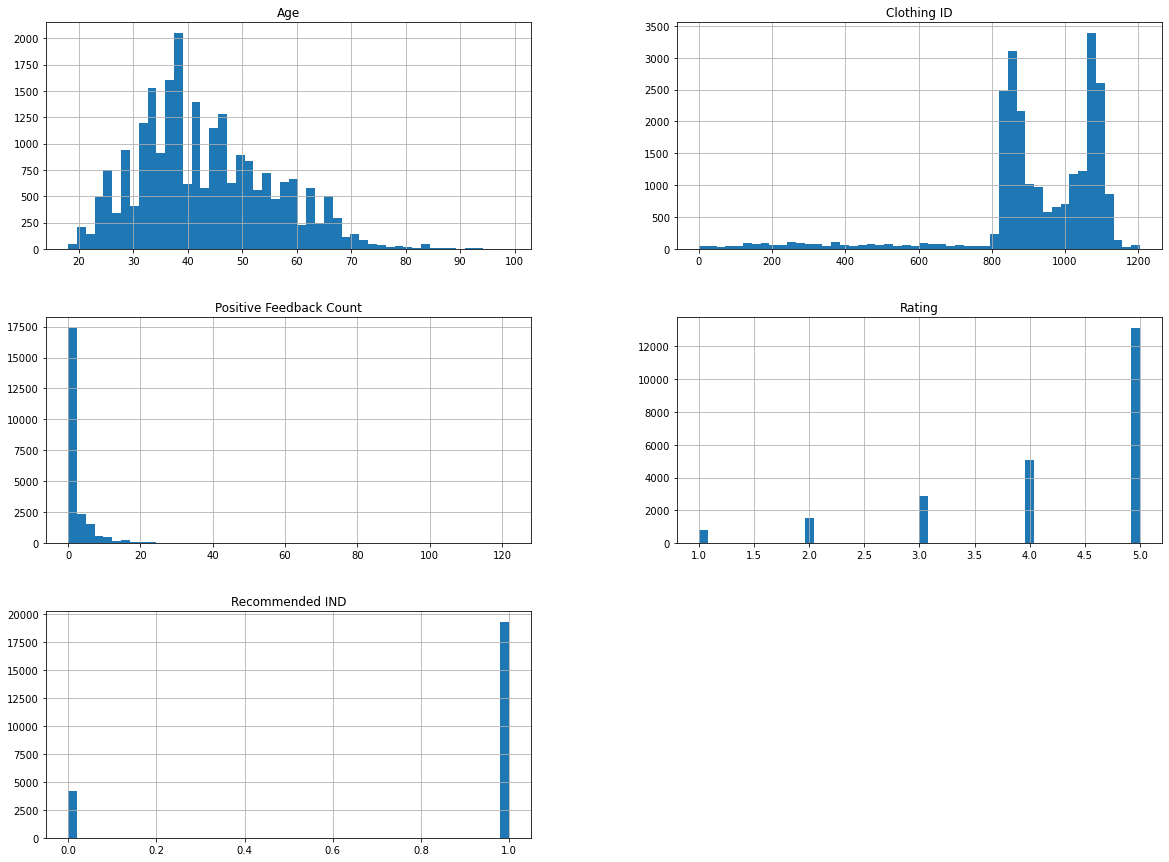

In [36]:
cr.hist(bins=50, figsize=(20,15))
plt.show()

In [37]:
cr['Title'].fillna('This is title', inplace=True)

In [38]:
cr['Review Text'].fillna('My Review', inplace=True)

In [39]:
cr['Division Name'].fillna('General', inplace=True)

In [40]:
cr['Department Name'].fillna('Tops', inplace=True)

In [41]:
cr['Class Name'].fillna('Dresses', inplace=True)

In [42]:
Q1 = cr.describe()['Rating']['25%']
Q3 = cr.describe()['Rating']['75%']

IQR = Q3 - Q1

In [43]:
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)

In [44]:
cr[(cr['Rating'] < Lower_Fence) | (cr['Rating'] > Upper_Fence)]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
22,1077,31,Not what it looks like,"First of all, this is not pullover styling. th...",2,0,7,General,Dresses,Dresses
26,949,33,Huge disappointment,I have been waiting for this sweater coat to s...,2,0,0,General,Tops,Sweaters
33,949,36,Mehh,"I ordered this 3 months ago, and it finally ca...",2,0,0,General,Tops,Sweaters
56,368,33,This is title,I am pregnant and i thought this would be a gr...,2,0,3,Initmates,Intimate,Intimates
...,...,...,...,...,...,...,...,...,...,...
23406,1082,68,Disappointed,I was very excited to find a fun and lightweig...,1,0,0,General,Dresses,Dresses
23424,854,58,Extremely sheer!,Before i ordered this i noted the other review...,2,0,0,General Petite,Tops,Knits
23427,854,42,Sheer shirt,What drew me to this shirt was the beautiful s...,2,0,65,General Petite,Tops,Knits
23437,1104,59,Not typical of retailer quality,This dress is so cute in the photo and fit tru...,2,0,2,General Petite,Dresses,Dresses


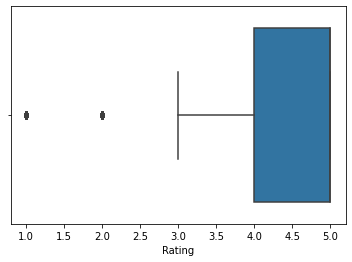

In [45]:
sns.boxplot(x=cr['Rating'])

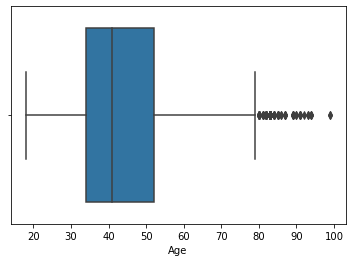

In [46]:
sns.boxplot(x=cr['Age'])

In [47]:
pd.crosstab(cr['Age'], columns='jumlah').T

Age,18,19,20,21,22,23,24,25,26,27,...,85,86,87,89,90,91,92,93,94,99
col_0,,,,,,,,,,,,,,,,,,,,,
jumlah,4,40,108,102,146,247,245,331,423,344,...,6,2,4,5,2,5,1,2,3,2


In [54]:
index = cr[(cr['Age'] > 75)].index
cr.drop(index, inplace=True)

cr['Age'].describe()

count    23319.000000
mean        42.919851
std         11.865442
min         18.000000
25%         34.000000
50%         41.000000
75%         51.000000
max         75.000000
Name: Age, dtype: float64

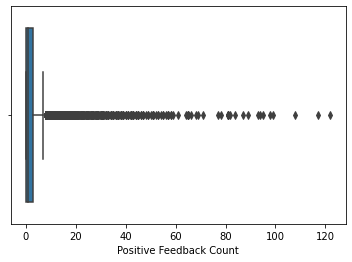

In [49]:
sns.boxplot(x=cr['Positive Feedback Count'])

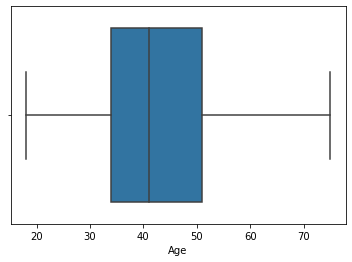

In [55]:
sns.boxplot(x=cr['Age'])

### Hipotesa awal
- Umur berpengaruh terhadap Rating

In [57]:
cr['Rating'].value_counts()

5    13013
4     5055
3     2862
2     1553
1      836
Name: Rating, dtype: int64

In [61]:
cr['Recommended IND'].value_counts()

1    19170
0     4149
Name: Recommended IND, dtype: int64

In [67]:
pd.crosstab(index=cr['Rating'], columns=cr['Recommended IND'])

Recommended IND,0,1
Rating,,
1,820,16
2,1460,93
3,1677,1185
4,168,4887
5,24,12989


In [66]:
pd.crosstab(index=cr['Rating'], columns=cr['Division Name'])

Division Name,General,General Petite,Initmates
Rating,,,
1,486,296,54
2,953,523,77
3,1768,939,155
4,3001,1741,313
5,7560,4564,889


In [68]:
pd.crosstab(index=cr['Rating'], columns=cr['Department Name'])

Department Name,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
Rating,,,,,,
1,115,226,63,49,372,11
2,203,458,90,60,731,11
3,420,837,178,91,1317,19
4,784,1386,369,200,2290,26
5,2259,3371,1018,623,5691,51


In [78]:
(pd.crosstab(index=cr['Class Name'], columns=cr['Rating'], normalize='index')*100).round(2)


Rating,1,2,3,4,5
Class Name,,,,,
Blouses,3.80,7.41,12.70,21.70,54.39
Casual bottoms,0.00,0.00,0.00,50.00,50.00
Chemises,0.00,0.00,0.00,100.00,0.00
Dresses,3.59,7.28,13.30,22.03,53.80
Fine gauge,2.75,6.87,10.81,20.88,58.70
Intimates,4.61,5.26,10.53,17.11,62.50
Jackets,4.99,5.42,8.84,16.83,63.91
Jeans,2.63,4.73,9.98,19.09,63.57
Knits,3.66,6.74,12.75,23.48,53.38


In [81]:
(pd.crosstab(index=[cr['Division Name'], cr['Department Name'], cr['Class Name']], columns=cr['Rating'], normalize='index')*100).round(2)


Rating                                            1      2      3       4  \
Division Name  Department Name Class Name                                   
General        Bottoms         Casual bottoms  0.00   0.00   0.00   50.00   
                               Jeans           2.55   4.98  10.98   18.14   
                               Pants           3.12   6.25  11.78   22.48   
                               Shorts          2.84   5.36  12.93   21.14   
                               Skirts          3.34   6.19  11.87   21.57   
               Dresses         Dresses         3.24   7.04  14.14   21.43   
               Jackets         Jackets         5.81   5.05   9.34   17.93   
                               Outerwear       3.67   6.12   9.39   26.53   
               Tops            Blouses         3.68   7.82  12.71   22.20   
                               Dresses         0.00   0.00   0.00    0.00   
                               Fine gauge      2.65   8.98  10.01   21.06   
                               Knits           3.89   6.74  13.32   23.65   
                               Sweaters        3.73   7.68  14.01   19.89   
               Trend           Trend           9.47  10.53  13.68   22.11   
General Petite Bottoms         Jeans           2.79   4.18   7.80   21.17   
                               Pants           2.92   5.29  10.77   18.98   
                               Skirts          4.09   4.09  10.82   22.81   
               Dresses         Dresses         4.12   7.66  12.16   23.01   
               Intimate        Lounge          3.91   5.65  10.00   24.35   
               Jackets         Jackets         3.93   5.90   8.20   15.41   
                               Outerwear       6.49   9.09   7.79   22.08   
               Tops            Blouses         4.01   6.66  12.68   20.80   
                               Fine gauge      2.91   3.39  12.11   20.58   
                               Knits           3.18   6.73  11.56   23.13   
                               Sweaters        3.06   6.88  13.58   17.02   
               Trend           Trend           8.70   4.35  26.09   21.74   
Initmates      Intimate        Chemises        0.00   0.00   0.00  100.00   
                               Intimates       4.61   5.26  10.53   17.11   
                               Layering        2.08   5.56   6.25   25.69   
                               Legwear         6.10   3.66   9.76   17.68   
                               Lounge          3.09   2.65  12.14   22.74   
                               Sleep           4.41   6.61   7.49   19.38   
                               Swim            2.88   8.07  12.10   21.04   

Rating                                              5  
Division Name  Department Name Class Name              
General        Bottoms         Casual bottoms   50.00  
                               Jeans            63.35  
                               Pants            56.37  
                               Shorts           57.73  
                               Skirts           57.02  
               Dresses         Dresses          54.14  
               Jackets         Jackets          61.87  
                               Outerwear        54.29  
               Tops            Blouses          53.58  
                               Dresses         100.00  
                               Fine gauge       57.29  
                               Knits            52.40  
                               Sweaters         54.69  
               Trend           Trend            44.21  
General Petite Bottoms         Jeans            64.07  
                               Pants            62.04  
                               Skirts           58.19  
               Dresses         Dresses          53.05  
               Intimate        Lounge           56.09  
               Jackets         Jackets          66.56  
                               Outerwear        54.55  
               T

In [83]:
(pd.crosstab(index=[cr['Division Name'], cr['Department Name'], cr['Class Name']], columns=[cr['Rating'], cr['Recommended IND']], normalize='index')*100).round(2)


Rating                                            1            2            3  \
Recommended IND                                   0     1      0     1      0   
Division Name  Department Name Class Name                                       
General        Bottoms         Casual bottoms  0.00  0.00   0.00  0.00   0.00   
                               Jeans           2.55  0.00   4.73  0.26   5.24   
                               Pants           3.12  0.00   6.01  0.24   7.69   
                               Shorts          2.84  0.00   4.73  0.63   7.89   
                               Skirts          3.34  0.00   6.02  0.17   6.35   
               Dresses         Dresses         3.16  0.08   6.59  0.46   7.94   
               Jackets         Jackets         5.56  0.25   5.05  0.00   5.30   
                               Outerwear       3.67  0.00   5.71  0.41   5.71   
               Tops            Blouses         3.53  0.15   7.37  0.45   7.52   
                               Dresses         0.00  0.00   0.00  0.00   0.00   
                               Fine gauge      2.65  0.00   8.39  0.59   6.33   
                               Knits           3.83  0.06   6.34  0.40   8.01   
                               Sweaters        3.62  0.11   7.34  0.34   8.70   
               Trend           Trend           9.47  0.00  10.53  0.00   4.21   
General Petite Bottoms         Jeans           2.79  0.00   3.06  1.11   3.06   
                               Pants           2.92  0.00   4.93  0.36   5.84   
                               Skirts          4.09  0.00   3.51  0.58   5.56   
               Dresses         Dresses         4.04  0.08   7.35  0.31   7.15   
               Intimate        Lounge          3.91  0.00   5.22  0.43   6.52   
               Jackets         Jackets         3.61  0.33   5.90  0.00   4.59   
                               Outerwear       6.49  0.00   7.79  1.30   5.19   
               Tops            Blouses         3.92  0.09   5.93  0.73   8.03   
                               Fine gauge      2.91  0.00   3.15  0.24   7.51   
                               Knits           3.11  0.06   6.48  0.25   6.67   
                               Sweaters        3.06  0.00   6.69  0.19   9.56   
               Trend           Trend           8.70  0.00   0.00  4.35  21.74   
Initmates      Intimate        Chemises        0.00  0.00   0.00  0.00   0.00   
                               Intimates       4.61  0.00   4.61  0.66   5.26   
                               Layering        2.08  0.00   4.86  0.69   3.47   
                               Legwear         6.10  0.00   3.05  0.61   4.27   
                               Lounge          2.87  0.22   2.65  0.00   7.28   
                               Sleep           4.41  0.00   5.73  0.88   3.52   
                               Swim            2.88  0.00   7.78  0.29   8.36   

Rating                                                  4             5  \
Recommended IND                                   1     0       1     0   
Division Name  Department Name Class Name                                 
General        Bottoms         Casual bottoms  0.00  0.00   50.00  0.00   
                               Jeans           5.75  0.38   17.75  0.00   
                               Pants           4.09  1.08   21.39  0.24   
                               Shorts          5.05  0.32   20.82  0.32   
                               Skirts          5.52  0.67   20.90  0.17   
               Dresses         Dresses         6.21  1.05   20.38  0.08   
               Jackets         Jackets         4.04  0.51   17.42  0.00   
                               Outerwear       3.67  0.82   25.71  0.41   
               Tops            Blouses         5.20  0.76   21.44  0.10   
                               Dresses         0.00  0.00    0.00  0.00   
                               Fine gauge      3.68  0.44   20.62  0.15   
                               Kn

In [90]:
bin_age = [0, 35, 55, 75]
label = ['Young', 'Middle Age', 'Old']

In [91]:
cr['age_bin'] = pd.cut(cr['Age'], bins=bin_age, labels = label)

In [92]:
cr.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,age_bin
0,767,33,This is title,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Young
1,1080,34,This is title,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Young
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Old
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Middle Age
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Middle Age


In [95]:
pd.crosstab(index=cr['Division Name'], columns=cr['age_bin'])

age_bin,Young,Middle Age,Old
Division Name,,,
General,4055,7273,2440
General Petite,2341,4316,1406
Initmates,580,711,197


In [96]:
pd.crosstab(index=cr['Department Name'], columns=cr['age_bin'])

age_bin,Young,Middle Age,Old
Department Name,,,
Bottoms,1067,2085,629
Dresses,2094,3252,932
Intimate,646,850,222
Jackets,313,490,220
Tops,2828,5554,2019
Trend,28,69,21


In [94]:
pd.crosstab(index=[cr['Division Name'], cr['Department Name'], cr['Class Name']], columns=cr['age_bin'])

age_bin                                        Young  Middle Age  Old
Division Name  Department Name Class Name                            
General        Bottoms         Casual bottoms      2           0    0
                               Jeans             183         480  120
                               Pants             217         463  152
                               Shorts            114         170   33
                               Skirts            202         300   96
               Dresses         Dresses          1261        1876  568
               Jackets         Jackets           122         180   94
                               Outerwear          79         122   44
               Tops            Blouses           525        1061  396
                               Dresses             4          10    0
                               Fine gauge        154         393  132
                               Knits             946        1695  594
                               Sweaters          222         471  192
               Trend           Trend              24          52   19
General Petite Bottoms         Jeans             101         196   62
                               Pants             134         304  110
                               Skirts            114         172   56
               Dresses         Dresses           833        1376  364
               Intimate        Lounge             66         139   25
               Jackets         Jackets            95         149   61
                               Outerwear          17          39   21
               Tops            Blouses           293         587  216
                               Fine gauge        107         225   81
                               Knits             447         829  298
                               Sweaters          130         283  110
               Trend           Trend               4          17    2
Initmates      Intimate        Chemises            0           1    0
                               Intimates          71          65   16
                               Layering           57          71   16
                               Legwear            63          72   29
                               Lounge            152         226   75
                               Sleep              67         119   41
                               Swim              170         157   20

In [97]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [98]:
cr['age_bin'].unique()

[Young, Old, Middle Age]
Categories (3, object): [Young < Middle Age < Old]

In [99]:
pd.options.display.max_columns=999

In [100]:
pd.get_dummies(data=cr, columns=['age_bin'], prefix_sep='-')

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,age_bin-Young,age_bin-Middle Age,age_bin-Old
0,767,33,This is title,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,1,0,0
1,1080,34,This is title,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,1,0,0
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0,0,1
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0,1,0
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,1,0,0
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,0,1,0
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,1,0,0
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,1,0,0


In [101]:
cr['Division Name'].unique()

array(['Initmates', 'General', 'General Petite'], dtype=object)

In [102]:
pd.options.display.max_columns=999

In [103]:
pd.get_dummies(data=cr, columns=['Division Name'], prefix_sep='-')

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Department Name,Class Name,age_bin,Division Name-General,Division Name-General Petite,Division Name-Initmates
0,767,33,This is title,Absolutely wonderful - silky and sexy and comf...,4,1,0,Intimate,Intimates,Young,0,0,1
1,1080,34,This is title,Love this dress! it's sooo pretty. i happene...,5,1,4,Dresses,Dresses,Young,1,0,0
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,Dresses,Dresses,Old,1,0,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,Bottoms,Pants,Middle Age,0,1,0
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,Tops,Blouses,Middle Age,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,Dresses,Dresses,Young,0,1,0
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,Tops,Knits,Middle Age,0,1,0
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,Dresses,Dresses,Young,0,1,0
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,Dresses,Dresses,Young,1,0,0
